# Q1

In [ ]:
"""
Explain the basic concept of clustering and give examples of applications where clustering is useful.
"""

In [ ]:
"""
Clustering is the process of grouping similar objects or data points together based on their inherent characteristics or patterns. It aims to discover natural groupings within the data without prior knowledge of the class labels. Clustering finds applications in various fields, including:

Customer Segmentation: Dividing customers into groups based on purchasing behavior.
Image Segmentation: Partitioning an image into meaningful regions.
Document Clustering: Organizing documents into topics for information retrieval.
Anomaly Detection: Identifying unusual patterns or outliers in data.
Social Network Analysis: Grouping individuals with similar interests or connections.
"""

# Q2

In [ ]:
"""
What is DBSCAN and how does it differ from other clustering algorithms such as k-means and hierarchical clustering?
"""

In [ ]:
"""
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It differs from k-means and hierarchical clustering in several ways:

DBSCAN does not require specifying the number of clusters in advance, unlike k-means and hierarchical clustering.
It can discover clusters of arbitrary shape, while k-means assumes clusters as spherical and hierarchical clustering requires a merge/split criterion.
DBSCAN can handle noise/outliers effectively by labeling them as such, whereas k-means and hierarchical clustering may assign outliers to the nearest cluster.
"""

# Q3

In [ ]:
"""
How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?
"""

In [ ]:
"""
The optimal values for the epsilon (ε) and minimum points parameters in DBSCAN can be determined using techniques such as:

Visual Inspection: Plotting the k-distance graph and looking for a "knee" or sudden change in the slope to determine the epsilon value.
Elbow Method: Plotting the sorted k-distance values and selecting the elbow point where the improvement in k-distance diminishes.
Domain Knowledge: Prior knowledge about the dataset and its characteristics can guide the selection of appropriate parameter values.
"""

# Q4

In [ ]:
"""
How does DBSCAN clustering handle outliers in a dataset?
"""

In [ ]:
"""
 DBSCAN handles outliers by labeling them as noise points. Outliers are identified as data points that do not have the minimum number of neighboring points within the specified epsilon distance. These points are not assigned to any cluster and are labeled as noise or outliers.
"""

# Q5

In [ ]:
"""
How does DBSCAN clustering differ from k-means clustering?
"""

In [ ]:
"""
DBSCAN clustering differs from k-means clustering in several aspects:

DBSCAN is a density-based algorithm, while k-means is a centroid-based algorithm.
DBSCAN can discover clusters of arbitrary shape, whereas k-means assumes spherical clusters.
DBSCAN does not require specifying the number of clusters in advance, unlike k-means.
DBSCAN can handle outliers effectively, while k-means may assign outliers to the nearest cluster.
"""

# Q6

In [ ]:
"""
Can DBSCAN clustering be applied to datasets with high dimensional feature spaces? If so, what are some potential challenges?
"""

In [ ]:
"""
DBSCAN clustering can be applied to datasets with high-dimensional feature spaces. However, high-dimensional data poses challenges, such as the curse of dimensionality, which can impact the effectiveness of distance-based density measures. Additionally, selecting appropriate values for epsilon and minimum points becomes more challenging due to increased dimensionality.
"""

# Q7

In [ ]:
"""
How does DBSCAN clustering handle clusters with varying densities?
"""

In [ ]:
"""
DBSCAN handles clusters with varying densities effectively. It can identify dense regions as core points and connect them to form clusters. Regions with lower densities are considered border points and are included in the clusters if they are close enough to the core points. This allows DBSCAN to adapt to clusters of varying densities.
"""

# Q8

In [ ]:
"""
What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?
"""

In [ ]:
"""
Common evaluation metrics used to assess the quality of DBSCAN clustering results include:

Silhouette Coefficient: Measures the compactness and separation of clusters.
Davies-Bouldin Index: Quantifies the cluster separation and compactness.
Calinski-Harabasz Index: Evaluates the ratio of between-cluster dispersion to within-cluster dispersion.
"""

# Q9

In [ ]:
"""
Can DBSCAN clustering be used for semi-supervised learning tasks?
"""

In [ ]:
"""
DBSCAN clustering is primarily an unsupervised learning algorithm. However, it can be used in semi-supervised learning tasks by combining it with other techniques. For example, DBSCAN can be used to identify dense regions and then assign labels based on a small amount of labeled data within those regions.
"""

# Q10

In [ ]:
"""
How does DBSCAN clustering handle datasets with noise or missing values?
"""

In [ ]:
"""
DBSCAN clustering can handle datasets with noise or missing values. It treats noise as separate points not assigned to any cluster. Missing values can be handled by imputing them or considering them as a separate category, depending on the specific implementation or preprocessing techniques used.
"""

# Q11

In [ ]:
"""
Implement the DBSCAN algorithm using a python programming language, and apply it to a sample dataset. Discuss the clustering results and interpret the meaning of the obtained clusters.
"""

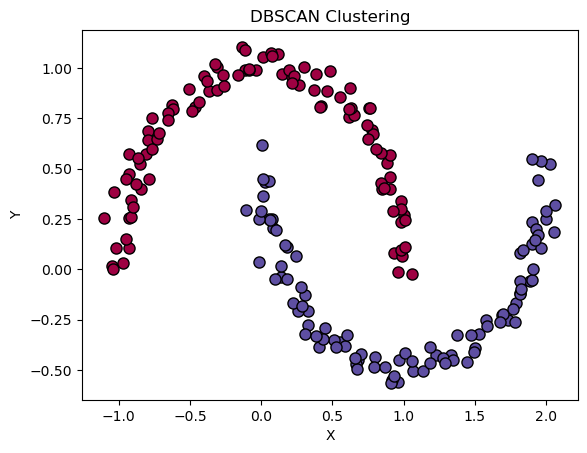

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate a sample dataset (moons shape)
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(X)

# Get the predicted labels and core sample indices
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present (-1 label)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Plot noise points in black
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=4)

plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
